# PR02_Demonstration of Data Cleaning and Manipulation with Pandas 

### Importing Pandas and loading data ###

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
# encoding option to deal with files in different formats
df = pd.read_csv('input/attacks.csv', encoding='ISO-8859-1')
df.head(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


### Explorating the original DataFrame ###

In [3]:
# original database
df.shape

(25723, 24)

In [4]:
# columns
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

## Hypothesis

1. **Row reduction** It is assumed that data prior to 1600 are not relevant.

In [5]:
df = df[df['Year'] >= 1600]

In [6]:
df.sort_values('Year', ascending=True).head(2)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
6167,1617.00.00.R,Reported 1617,1617.0,Unprovoked,INDIA,West Bengal,Ganges Delta,NaN,Indian people,NaN,...,NaN,"H. Edwards, p.31, citing Samuel Purchas",1617.00.00-Purchas.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1617.00.00.R,1617.00.00.R,136.0,NaN,NaN
6166,1637.00.00.R,Reported 1637,1637.0,Unprovoked,INDIA,West Bengal,Hooghly River mouth,Wading,Hindu pilgrims,NaN,...,NaN,"H. Edwards, p.31, citing Sebastian Manrique",1637.00.00.R-Manrique.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1637.00.00.R,1637.00.00.R,137.0,NaN,NaN


2. **Column reduction**  Based on the number of nulls/columns, we select the columns to use in the analysis

In [7]:
# number of nulls/columns --> Remove!
nulls_cols = df.isnull().sum()
nulls_cols

Case Number                  1
Date                         0
Year                         0
Type                         4
Country                     44
Area                       426
Location                   499
Activity                   523
Name                       205
Sex                        557
Age                       2710
Injury                      25
Fatal (Y/N)                537
Time                      3226
Species                   2740
Investigator or Source      17
pdf                          0
href formula                 1
href                         0
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               6166
Unnamed: 23               6165
dtype: int64

In [8]:
# hp: remove the columns with 40% of missing values (columns NOT relevant for my analysis)
# drop selected columns
drop_cols = list(nulls_cols[nulls_cols > 0.4 * 6302].index)
df = df.drop(drop_cols, axis=1)
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Injury,Fatal (Y/N),Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,"No injury to occupant, outrigger canoe and pad...",N,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,Minor injury to left thigh,N,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,Injury to left lower leg from surfboard skeg,N,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,Minor injury to lower leg,N,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,Lacerations to leg & hand shark PROVOKED INCIDENT,N,A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6164,1642.00.00.b,Late 1600s Reported 1728,1642.0,Invalid,GUINEA,NaN,NaN,Went overboard,crew member of the Nieuwstadt,M,FATAL,NaN,"History of the Pyrates, by D. Defoe, Vol. 2, p.28",1642.00.00.b-Nieuwstadt.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1642.00.00.b,1642.00.00.b,139.0
6165,1638.00.00.R,Reported 1638,1638.0,Unprovoked,NaN,NaN,NaN,NaN,sailors,M,NaN,UNKNOWN,Sir Thomas Herbert,1638.00.00.R-Herbert,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1638.00.00.R,1638.00.00.R,138.0
6166,1637.00.00.R,Reported 1637,1637.0,Unprovoked,INDIA,West Bengal,Hooghly River mouth,Wading,Hindu pilgrims,NaN,NaN,UNKNOWN,"H. Edwards, p.31, citing Sebastian Manrique",1637.00.00.R-Manrique.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1637.00.00.R,1637.00.00.R,137.0
6167,1617.00.00.R,Reported 1617,1617.0,Unprovoked,INDIA,West Bengal,Ganges Delta,NaN,Indian people,NaN,NaN,UNKNOWN,"H. Edwards, p.31, citing Samuel Purchas",1617.00.00-Purchas.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1617.00.00.R,1617.00.00.R,136.0


### Cleaning text and data type correction ###

Premise: I'll analyse and clean only the columns that I'll use in my study ['case_number','date','year','type','country','area','activity','sex','injury','fatal (y/n)']

In [9]:
# check data types of the entire data base
df.dtypes

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Injury                     object
Fatal (Y/N)                object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
dtype: object

In [10]:
# COLUMN'S NAMES
# making changes at the column's names: deleting white spaces/ change all the letters to lowercase
df.columns = df.columns.to_series().apply(lambda x: x.strip().lower())
df.columns

Index(['case number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'injury', 'fatal (y/n)',
       'investigator or source', 'pdf', 'href formula', 'href',
       'case number.1', 'case number.2', 'original order'],
      dtype='object')

In [11]:
# CASE NUMBER
# elimination of the white spaces from the 'case number' column 
df.rename(columns={'case number':'case_number'}, inplace=True)

In [12]:
# print(set(df['case_number']))

In [13]:
# elimination of the final 'R' from 'case_number' --> 'Reported'
df['case_number'] = df['case_number'].str.replace(r'(.R)$','')

In [14]:
# YEAR
# filling a missing value with a default 0 value that i'll change
df.year = df.year.fillna(0)

In [15]:
# check the 'year' column data type
df.year.dtype

dtype('float64')

In [16]:
# change from float to int
df.year = df.year.astype(int)
df.year.dtype
df.head(2)

,case_number,date,year,type,country,area,location,activity,name,sex,injury,fatal (y/n),investigator or source,pdf,href formula,href,case number.1,case number.2,original order
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,"No injury to occupant, outrigger canoe and pad...",N,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,Minor injury to left thigh,N,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0


In [17]:
# TYPE
# reduction of types unifying 'Boatomg','Boat' and 'Boating'
# print(set(df['type']))
df['type'] = df['type'].str.replace('Boatomg','Boating').replace('Boat','Boating')

In [18]:
print(set(df['type']))

{'Sea Disaster', nan, 'Provoked', 'Invalid', 'Boating', 'Unprovoked', 'Questionable'}


In [19]:
# COUNTRY
# making changes to the 'country' column 
df['country'].str.replace('?','').str.replace(' / ','/').str.upper().unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', nan, 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, BRITISH OVERSEAS TERRITORY', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'FIJI', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'PUERTO RICO', 'ITALY',
       'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 'UNITED ARAB E

In [20]:
# SEX
# drop all the lines with invalid values

In [21]:
df.drop(df[df.sex=='lli'].index, inplace=True)
df.drop(df[df.sex=='N'].index, inplace=True)
df.drop(df[df.sex=='Unknown'].index, inplace=True)
df.sex.str.replace(' ','').replace('.','')
df.sex = df.sex.str.strip()

In [22]:
print(set(df['sex']))

{'F', nan, 'M', '.'}


In [23]:
# FATAL
# drop all the lines with invalid values

In [24]:
df['fatal (y/n)'] = df['fatal (y/n)'].str.strip()
df['fatal (y/n)'] = df['fatal (y/n)'].str.upper()
df.drop(df[df['fatal (y/n)']=='UNKNOWN'].index, inplace=True)
df.drop(df[df['fatal (y/n)']=='2017'].index, inplace=True)
df.drop(df[df['fatal (y/n)']=='M'].index, inplace=True)

In [25]:
print(set(df['fatal (y/n)']))

{'N', nan, 'Y'}


### Missing Values ###

In [26]:
# let's analyse the others columns to see what's going on
# number of nulls/columns
nulls_cols = df.isnull().sum()
nulls_cols

case_number                 1
date                        0
year                        0
type                        4
country                    42
area                      419
location                  489
activity                  490
name                      197
sex                       526
injury                      8
fatal (y/n)               537
investigator or source     16
pdf                         0
href formula                1
href                        0
case number.1               0
case number.2               0
original order              0
dtype: int64

In [27]:
# INVESTIGATION!

In [28]:
# 'case number'
null_casenumb = df[(df['case_number'].isnull()==True)]
null_casenumb.head()

,case_number,date,year,type,country,area,location,activity,name,sex,injury,fatal (y/n),investigator or source,pdf,href formula,href,case number.1,case number.2,original order
5488,NaN,Reported 06-Sep-1905,1905,Provoked,USA,Florida,"Fort Pierce, St Lucie County",Fishing,David Curry,M,Lacerations to leg from hooked shark PROVOKED ...,N,"Muncie Evening Press, 8/6/1913",1905.09.06.R-Curry.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1905.09.06.R,1905.09.06.R,815.0


In [29]:
# 'CASE_NUMBER'
df.iloc[5486:5491, :]

,case_number,date,year,type,country,area,location,activity,name,sex,injury,fatal (y/n),investigator or source,pdf,href formula,href,case number.1,case number.2,original order
5545,1901.07.30,30-Jul-1901,1901,Unprovoked,SOUTH AFRICA,Western Cape Province,Windmill Beach,Swimming,"John Hendrick Adrian Chandler, a prisoner of war",M,"Right leg bitten & foot severed, right arm bit...",Y,"M. Levine, GSAF",1901.07.30-Chandler.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1901.07.30,1901.07.30,758.0
5546,1901.07.17,17-Jul-1901,1901,Invalid,ITALY,Syracuse,Capo Santa Croce,Swimming,Antonio Tornatori,M,"Disappeared, but shark involvement unconfirmed",NaN,C. Moore. GSAF,1901.07.17-Antonio.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1901.07.17,1901.07.17,757.0
5547,1901.06.29,Reported 29-Jun-1901,1901,Invalid,YEMEN,Aden,NaN,Diving around anchored liner,boy,M,NaN,NaN,"The Graphic, 6/29/1901",1901.06.29.R-Aden.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1901.06.29.R,1901.06.29.R,756.0
5548,1901.06.24,24-Jun-1901,1901,Unprovoked,PHILIPPINES,Western Viscayas,"Island of Panay, Iliolo",Swimming,"S. McKie, apprentice 1st class on the U.S. Nav...",M,"Left thigh stripped of flesh 4"" above the knee",N,"J.A. Guthrie; Sun, 7/13/1913; V.M. Coppleson,...",1901.06.24-McK.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1901.06.24,1901.06.24,755.0
5549,1901.01.30,30-Jan-1901,1901,Unprovoked,AUSTRALIA,Queensland,Brisbane,Bathing,John Thompson,M,"Thigh bitten, FATAL",Y,"Otago Witness, 2/6/1901",1901.01.30-Thompson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1901.01.30,1901.01.30,754.0


In [30]:
# changing the missing 'case number' with the date of the attack
df.case_number = df.case_number.fillna('1905.09.06')

In [31]:
# TYPE
null_type = df[(df['type'].isnull()==True)]
# creation a subset with the activity people were doing --> maybe there is a correlation
null_type = null_type[['type','activity']]
null_type

,type,activity
85,NaN,Fishing
382,NaN,Surfing
4867,NaN,Wreck of a sampam
5705,NaN,Diving


In [32]:
# comparing similar activities, it is reasonable to think that all the missing activities are 'Unprovoked'
df.groupby('activity').get_group('Fishing')
df.groupby('activity').get_group('Surfing')
df.groupby('activity').get_group('Diving')
df.groupby('activity').get_group('Wreck of a sampam')

,case_number,date,year,type,country,area,location,activity,name,sex,injury,fatal (y/n),investigator or source,pdf,href formula,href,case number.1,case number.2,original order
4867,1936.09.11,Reported 11-Sep-1936,1936,NaN,VIETNAM,NaN,Saigon,Wreck of a sampam,8 crew,M,FATAL,Y,"Lansing State Journal, 9/11/1936",1936.09.11-Saigon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1936.09.11.R,1936.09.11.R,1436.0


In [33]:
# replace missing values with 'Unprovoked'
df.type = df.type.fillna('Unprovoked')

In [34]:
# COUNTRY, AREA, LOCATION
# If the area, the position and the country are null, it is impossible to determine them --> 'Unknown'
df[(df['country'].isnull()==True) & (df['area'].isnull()==True) & (df['location'].isnull()==True)]

,case_number,date,year,type,country,area,location,activity,name,sex,injury,fatal (y/n),investigator or source,pdf,href formula,href,case number.1,case number.2,original order
62,2017.11.13,Reported 13-Nov-2017,2017,Unprovoked,NaN,NaN,NaN,Surfing,Timur Yunusov,M,Puncture wounds to feet,N,Instagram,2017.11.13.R-Timur.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.13.R,2017.11.13.R,6241.0
525,2014.08.00,Aug-2014,2014,Invalid,NaN,NaN,NaN,Sea disaster,Cuban refugees,M,Shark involvement prior to death not confirmed,NaN,"Associated Press, 11/27/2014",2014.08.00-Cuban-refugees.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2014.08.00,2014.08.00,5778.0
3378,1970.11.00,Nov-1970,1970,Unprovoked,NaN,NaN,NaN,NaN,Heinz Plotsky,M,Extensive injuries,N,"H.D. Baldridge (1994), SAF Case #1645",1970.11.00-NV-Plotsky.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.11.00,1970.11.00,2925.0
3388,1970.07.05,5-Jul-1970,1970,Unprovoked,NaN,NaN,NaN,NaN,male,M,Finger or toe severed,N,"H.D. Baldridge (1994), SAF Case #1628",1970.07.05-NV-male.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.07.05,1970.07.05,2915.0
3395,1970.04.00.b,Apr-1970,1970,Provoked,NaN,NaN,NaN,Freediving,Lionel Jarvis,M,Arm abraded & lacerated. Recorded as PROVOKED ...,N,"H.D. Baldridge (1994), SAF Case #1616",1970.04.00.b-NV-Jarvis.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.04.00.b,1970.04.00.b,2908.0
3399,1970.02.05,5-Feb-1970,1970,Unprovoked,NaN,NaN,NaN,Wading,Sally Anne Irvine,F,Lacerations to lower leg,N,H.D. Baldridge (1994) SAF Case #1626,1970.02.05-NV-Irvine.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.02.05,1970.02.05,2904.0
3425,1969.08.00,Aug-1969,1969,Unprovoked,NaN,NaN,NaN,NaN,Rodney Hughes,M,Am lacerated,N,H.D. Baldridge (1994) SAF Case #1602,1969.08.00-NV-Hughes.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1969.08.00,1969.08.00,2878.0
3661,1964.09.27,27-Sep-1964,1964,Invalid,NaN,NaN,NaN,Spearfishing,Giancarlo Griffon,M,"Disappeared, probable drowning but sharks in a...",NaN,C. Moore. GSAF,1964.09.27-Griffon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1964.09.27,1964.09.27,2642.0
4726,1942.00.00.e,1942,1942,Sea Disaster,NaN,NaN,NaN,Jumped overboard from torpedoed Panamanian fre...,male,M,FATAL,Y,"V.M. Coppleson (1962), p.258",1942.00.00.e-seaman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1942.00.00.e,1942.00.00.e,1577.0
4729,1942.00.00.b,1942,1942,Boating,NaN,NaN,NaN,"Days before the surrender of Singapore, the 3 ...","Bombardier J. Hall, Private Green of the Sherw...",M,No injury to occupants. Sharks continually fol...,N,"V.M. Coppleson (1962), p.206",1942.00.00.b-Hall-Green-Jennings.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1942.00.00.b,1942.00.00.b,1574.0


In [35]:
df.loc[(df['country'].isnull()==True) & (df['area'].isnull()==True) & (df['location'].isnull()==True),['country','area','location']] = 'UNKNOWN'

In [36]:
# LOCATION Impossible to know --> 'No location'
null_location = df[(df['location'].isnull()==True)]

In [37]:
df.loc[(df['location'].isnull()==True), ['location']] = 'No Location'

In [38]:
# AREA Impossible to specify it --> 'No area'
null_area = df[(df['area'].isnull()==True)]

In [39]:
df.loc[(df['area'].isnull()==True), ['area']] = 'No Area'

In [40]:
# COUNTRY 
null_country = df[(df['country'].isnull()==True)]

In [41]:
# Mediterranean Sea
df.loc[(df['area']=='Ionian Sea') | (df['area']=='Mediterranean Sea'),'country'] = 'MEDITERRANEAN SEA'

In [42]:
# England
df.loc[(df['area']=='English Channel'),'country'] = 'ENGLAND'

In [43]:
# Central and South America (Cuba-Panama-Colombia) 
df.loc[(df['area']=='Caribbean Sea') | (df['area']=='Off South American coast') | (df['area']=='300 miles east of St. Thomas (Virgin Islands)'),'country'] = 'CENTRAL AND SOUTH AMERICA'

In [44]:
# Australia  
df.loc[(df['area']=='Between Timor & Darwin, Australia'),'country'] = 'AUSTRALIA'

In [45]:
# Thailand 
df.loc[(df['area']=='Near the Andaman & Nicobar Islands'),'country'] = 'THAILAND'

In [46]:
# Africa
df.loc[(df['area']=='Between Comores & Madagascar'),'country'] = 'AFRICA'

In [47]:
# Antarctic
df.loc[(df['area']=='French Southern Territories'),'country'] = 'ANTARCTIC'

In [48]:
# USA
df.loc[(df['area']=='Gulf of California'),'country'] = 'USA'

In [49]:
# Atlantic Ocean
df.loc[(df['area']=='St Helena'),'country'] = 'MID ATLANTIC OCEAN'

In [50]:
# Other
df.loc[(df['area']=='No Area') | (df['area']=='Western Banks'),'country'] = 'UNKNOWN'

In [51]:
# ESTA FUNCIÓN NO ME FUNCIONA PERO ME GUSTARÍA REVISARLA.... CREO QUE CASI ESTÁ PERO NO CONSIGO SOLUCIONAR EL ERROR #
# PROBABLEMENTE SE PODRÁ HACER DE ALGUNA FORMA MÁS SENCILLA
# df in variable
# def get_country(x):
    
#     if x.loc[(x['area']=='Ionian Sea') | (x['area']=='Mediterranean Sea')]: 
#         return 'MEDITERRANEAN SEA'
    
#     elif x.loc[(df['area']=='English Channel')]:
#         return 'ENGLAND'
    
#     elif x.loc[(df['area']=='Caribbean Sea') | (df['area']=='Off South American coast') | (df['area']=='300 miles east of St. Thomas (Virgin Islands)')]:
#         return 'CENTRAL AND SOUTH AMERICA'
    
#     elif x.loc[(df['area']=='Between Timor & Darwin, Australia')]:
#         return 'AUSTRALIA'
    
#     elif x.loc[(df['area']=='Near the Andaman & Nicobar Islands')]:
#         return 'THAILAND'
    
#     elif x.loc[(df['area']=='Between Comores & Madagascar')]:
#         return 'AFRICA'
    
#     elif x.loc[(df['area']=='French Southern Territories')]:
#         return 'ANTARCTIC'
    
#     elif x.loc[(df['area']=='Gulf of California')]:
#         return 'USA'
    
#     elif x.loc[(df['area']=='St Helena')]:
#         return 'MID ATLANTIC OCEAN'
    
#     elif x.loc[(df['area']=='No Area') | (df['area']=='Western Banks')]:
#         return 'UNKNOWN'
    
# df['country'] = df.apply(get_country, axis=1)

In [52]:
# NAME & SEX
# If the name or the sex are null, it is impossible to determine them --> 'Unknown'
df[(df['name'].isnull()==True) & (df['sex'].isnull()==True)]

,case_number,date,year,type,country,area,location,activity,name,sex,injury,fatal (y/n),investigator or source,pdf,href formula,href,case number.1,case number.2,original order
32,2018.04.09,09-Apr-2018,2018,Unprovoked,UNKNOWN,No Area,"Magenta Beach, Noumea",Windsurfing,NaN,NaN,"No injury, shark bit board",N,"Les Nouvelles Caledoniennes, 4/10/2018",2018.04.09-Magenta.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.09,2018.04.09,6271.0
86,2017.09.14,Sep-2017,2017,Boating,AUSTRALIA,Westerm Australia,Esperance,Fishing,NaN,NaN,"sharks rammed boats, no injury to occupants",N,"B. Myatt, GSAF",2017.09.14-EsperanceBoats.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.14,2017.09.14,6217.0
124,2017.07.02,02-Jul-2017,2017,Invalid,COMOROS,Anjouan,Moya,Fishing,NaN,NaN,"Skull found in shark, a probable drowning & sc...",NaN,"Linfo, 7/3/2017",2017.07.02-Comoros.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.02,2017.07.02,6179.0
154,2017.04.17.b,17-Apr-2017,2017,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",NaN,NaN,NaN,Minor bite to the foot,N,"Daytona Beach News-Journal, 4/17/2017",2017.04.17.b-Volusia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.04.17.b,2017.04.17.b,6149.0
226,2016.09.00,Sep-2016,2016,Invalid,UNKNOWN,No Area,Guadalupe Island,Cage Diving,NaN,NaN,"No injury to divers, white shark breached cage",NaN,K. Yonker,2016.09.00-Breach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.00,2016.09.00,6077.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6044,1847.02.12,12-Feb-1847,1847,Sea Disaster,UNKNOWN,No Area,No Location,Wreck of the Tweed,NaN,NaN,FATAL,Y,"The Guardian, 3/26/1858",1847.02.12-Tweed.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1847.02.12,1847.02.12,259.0
6080,1836.07.26,1836.07.26.R,1836,Invalid,UNKNOWN,No Area,No Location,NaN,NaN,NaN,"Shark caught, contained human remains",NaN,"C. Moore, GSAF",1836.07.26.R-Spain.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1836.07.26.R,1836.07.26.R,223.0
6122,1808.06.01,Reported 01-May-1808,1808,Sea Disaster,UNKNOWN,No Area,Falmouth Harbour,NaN,NaN,NaN,Probable drowning & scavenging,NaN,"London Observer, 5/1/1808",1808.05.01.R-Antigua.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1808.05.01.R,1808.06.01.R,181.0
6130,1802.04.13,Reported Apr-13-1802,1802,Unprovoked,UNKNOWN,No Area,No Location,NaN,NaN,NaN,FATAL,Y,Evening Post (New York) 4/13/1802,1802.04.13.R-India.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1802.04.13.R,1802.04.13.R,173.0


In [53]:
df.loc[(df['name'].isnull()==True) | (df['sex'].isnull()==True),['name','sex']] = 'Unknown'

In [54]:
# SEX
# check!
# null_sex = df[(df['sex'].isnull()==True)]
# null_sex['name'].unique()

In [55]:
# ACTIVITY, FATAL & INJURY
# If the activity, the injury and the gravity of the attack are unknown, this cases are not relevant. We can drop them.
df[(df['activity'].isnull()==True) & (df['fatal (y/n)'].isnull()==True) & (df['injury'].isnull()==True)]

,case_number,date,year,type,country,area,location,activity,name,sex,injury,fatal (y/n),investigator or source,pdf,href formula,href,case number.1,case number.2,original order
5370,1912.05.04,04-May-1912,1912,Invalid,SOUTH AFRICA,KwaZulu-Natal,Durban,NaN,arm recovered from hooked shark,M,NaN,NaN,"M. Levine, GSAF",1912.05.04-arm.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1912.05.04,1912.05.04,933.0
5965,1862.12.04,04-Dec-1862,1862,Invalid,NEW ZEALAND,South Island,Lyttleton?,NaN,Unknown,Unknown,NaN,NaN,"Bendigo Advertiser, 1/3/1863",1862.12.04-Lyttleton.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1862.12.04,1862.12.04,338.0


In [56]:
df.drop([5370,5965], axis= 0)
df.head(3)

,case_number,date,year,type,country,area,location,activity,name,sex,injury,fatal (y/n),investigator or source,pdf,href formula,href,case number.1,case number.2,original order
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,"No injury to occupant, outrigger canoe and pad...",N,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,Minor injury to left thigh,N,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,Injury to left lower leg from surfboard skeg,N,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0


In [57]:
# FATAL & INJURY
# If we don't have information about injuries/fatal attacks, it is impossible to determine them --> 'Unknown'
df[(df['fatal (y/n)'].isnull()==True) & (df['injury'].isnull()==True)]

,case_number,date,year,type,country,area,location,activity,name,sex,injury,fatal (y/n),investigator or source,pdf,href formula,href,case number.1,case number.2,original order
1366,2007.07.00,Jul-2007,2007,Invalid,UNKNOWN,No Area,No Location,Murder,Unknown,Unknown,NaN,NaN,"Daily Guide, 8/20/2007",2007.07.00-Takyi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2007.07.00,2007.07.00,4937.0
3207,1975.10.04,04-Oct-1975,1975,Invalid,USA,California,"Seal Beach, Orange County",Surfing,Unknown,Unknown,NaN,NaN,Unconfirmed Report,1975.10.04-NV-California.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1975.10.04,1975.10.04,3096.0
3457,1968.09.22,22-Sep-1968,1968,Invalid,USA,Florida,"Riviera Beach, Palm Beach County",Surfing,Unknown,Unknown,NaN,NaN,"M. Vorenberg, GSAF",1968.09.22-NV-RivieraBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1968.09.22,1968.09.22,2846.0
3491,1968.00.00.a,1968,1968,Invalid,USA,Florida,"Jensen Beach, Martin County",Surfing,Unknown,Unknown,NaN,NaN,Unverified,1968.00.00.a-NV-JensenBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1968.00.00.a,1968.00.00.a,2812.0
5370,1912.05.04,04-May-1912,1912,Invalid,SOUTH AFRICA,KwaZulu-Natal,Durban,NaN,arm recovered from hooked shark,M,NaN,NaN,"M. Levine, GSAF",1912.05.04-arm.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1912.05.04,1912.05.04,933.0
5547,1901.06.29,Reported 29-Jun-1901,1901,Invalid,YEMEN,Aden,No Location,Diving around anchored liner,boy,M,NaN,NaN,"The Graphic, 6/29/1901",1901.06.29.R-Aden.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1901.06.29.R,1901.06.29.R,756.0
5965,1862.12.04,04-Dec-1862,1862,Invalid,NEW ZEALAND,South Island,Lyttleton?,NaN,Unknown,Unknown,NaN,NaN,"Bendigo Advertiser, 1/3/1863",1862.12.04-Lyttleton.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1862.12.04,1862.12.04,338.0


In [58]:
df.loc[(df['injury'].isnull()==True) | (df['fatal (y/n)'].isnull()==True),['injury','fatal (y/n)']] = 'Unknown'

In [59]:
# ACTIVITY & INJURY
# If we don't have information about injuries/fatal attacks, it is impossible to determine them --> 'Unknown'
df[(df['activity'].isnull()==True) | (df['injury'].isnull()==True)]

,case_number,date,year,type,country,area,location,activity,name,sex,injury,fatal (y/n),investigator or source,pdf,href formula,href,case number.1,case number.2,original order
47,2018.01.28,28-Jan-2018,2018,Unprovoked,AUSTRALIA,Western Australia,Cone Bay,NaN,male,M,Injuries to right leg,N,"ABC.net.au, 01/28/2018",2018.01.28-ConeBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.01.28,2018.01.28,6256.0
108,2017.07.29.a,29-Jul-2017,2017,Unprovoked,USA,South Carolina,"DeBordieu Colony, Georgetown County",NaN,female x 2,F,Bite to left thigh / minor injury,N,"C. Creswell, GSAF",2017.07.29.a-Georgetown.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.29.a,2017.07.29.a,6195.0
112,2017.07.23.b,23-Jul-2017,2017,Unprovoked,USA,New Jersey,Ventnor,NaN,Isabella Smith,F,Minor injury to hand,N,A. Smith,2017.07.23.b-Smith.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.23.b,2017.07.23.b,6191.0
114,2017.07.22,22-Jul-2017,2017,Unprovoked,USA,Florida,"Snipes Point, Monroe County",NaN,female,F,Foot bitten,N,"NBC Miami, 7/23/2017",2017.07.22-Keys.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.22,2017.07.22,6189.0
154,2017.04.17.b,17-Apr-2017,2017,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",NaN,Unknown,Unknown,Minor bite to the foot,N,"Daytona Beach News-Journal, 4/17/2017",2017.04.17.b-Volusia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.04.17.b,2017.04.17.b,6149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,1783.03.02,02-Mar-1783,1783,Sea Disaster,UNKNOWN,No Area,Foundering of the privateer Holker,NaN,Unknown,Unknown,Many of the crew were taken by sharks,Y,"C.Moore, GSAF",1783.03.02-Martinique.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1783.03.02,1783.03.02,162.0
6145,1776.00.00.b,1776,1776,Boating,UNKNOWN,No Area,No Location,NaN,Unknown,Unknown,FATAL,Y,T. Pennant,1776.00.00-Greenland.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1776.00.00.b,1776.00.00.b,158.0
6157,1733.00.00,1733,1733,Invalid,ICELAND,Bardestrand,Talkknefiord,NaN,Unknown,Unknown,Unknown,Unknown,E. Olafsen,1733.00.00-Iceland.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1733.00.00,1733.00.00,146.0
6158,1723.00.00,1723,1723,Unprovoked,UNKNOWN,No Area,No Location,NaN,Philip Ashton,M,Unknown,Unknown,"C.Moore, GSAF",1730.00.00-Ashton.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1723.00.00,1723.00.00,145.0


In [60]:
null_injury = df[(df['activity'].isnull()==True)]
# null_injury['injury'].unique()

In [61]:
# ACTIVITY
# It is quite difficult to determine precisely the type of activity although it is not impossible
# In this case I will put all the parameters as 'Unknown' to focus on other aspects of the problem, aware that this point could be deepened
null_activity = df[(df['activity'].isnull()==True)]
null_activity

,case_number,date,year,type,country,area,location,activity,name,sex,injury,fatal (y/n),investigator or source,pdf,href formula,href,case number.1,case number.2,original order
47,2018.01.28,28-Jan-2018,2018,Unprovoked,AUSTRALIA,Western Australia,Cone Bay,NaN,male,M,Injuries to right leg,N,"ABC.net.au, 01/28/2018",2018.01.28-ConeBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.01.28,2018.01.28,6256.0
108,2017.07.29.a,29-Jul-2017,2017,Unprovoked,USA,South Carolina,"DeBordieu Colony, Georgetown County",NaN,female x 2,F,Bite to left thigh / minor injury,N,"C. Creswell, GSAF",2017.07.29.a-Georgetown.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.29.a,2017.07.29.a,6195.0
112,2017.07.23.b,23-Jul-2017,2017,Unprovoked,USA,New Jersey,Ventnor,NaN,Isabella Smith,F,Minor injury to hand,N,A. Smith,2017.07.23.b-Smith.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.23.b,2017.07.23.b,6191.0
114,2017.07.22,22-Jul-2017,2017,Unprovoked,USA,Florida,"Snipes Point, Monroe County",NaN,female,F,Foot bitten,N,"NBC Miami, 7/23/2017",2017.07.22-Keys.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.22,2017.07.22,6189.0
154,2017.04.17.b,17-Apr-2017,2017,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",NaN,Unknown,Unknown,Minor bite to the foot,N,"Daytona Beach News-Journal, 4/17/2017",2017.04.17.b-Volusia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.04.17.b,2017.04.17.b,6149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,1783.03.02,02-Mar-1783,1783,Sea Disaster,UNKNOWN,No Area,Foundering of the privateer Holker,NaN,Unknown,Unknown,Many of the crew were taken by sharks,Y,"C.Moore, GSAF",1783.03.02-Martinique.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1783.03.02,1783.03.02,162.0
6145,1776.00.00.b,1776,1776,Boating,UNKNOWN,No Area,No Location,NaN,Unknown,Unknown,FATAL,Y,T. Pennant,1776.00.00-Greenland.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1776.00.00.b,1776.00.00.b,158.0
6157,1733.00.00,1733,1733,Invalid,ICELAND,Bardestrand,Talkknefiord,NaN,Unknown,Unknown,Unknown,Unknown,E. Olafsen,1733.00.00-Iceland.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1733.00.00,1733.00.00,146.0
6158,1723.00.00,1723,1723,Unprovoked,UNKNOWN,No Area,No Location,NaN,Philip Ashton,M,Unknown,Unknown,"C.Moore, GSAF",1730.00.00-Ashton.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1723.00.00,1723.00.00,145.0


In [62]:
df.loc[(df['activity'].isnull()==True)] = 'Unknown'

In [63]:
# INVESTIGATOR OR SOURCE
# I don't think data of this column are not so relevant... I'll replace nulls with a 'Unknown' (because all the other sources are known)
null_inv = df[(df['investigator or source'].isnull()==True)]

In [64]:
investigators = df['investigator or source'].unique().tolist()

for name in investigators:
    if name != 'Unknown':
        print(f'The investigator/souce is known')
        break
    else:
        print(f'Unknown')

The investigator/souce is known


In [65]:
# replace 0 with 'Unknown'
df['investigator or source'] = df['investigator or source'].fillna('Unknown')

In [66]:
# HREF FORMULA
# like above
null_hrefform = df[(df['href formula'].isnull()==True)]
null_hrefform

,case_number,date,year,type,country,area,location,activity,name,sex,injury,fatal (y/n),investigator or source,pdf,href formula,href,case number.1,case number.2,original order
3244,1975.01.19,19-Jan-1975,1975,Unprovoked,AUSTRALIA,South Australia,Coffin Bay,Surfing,David Barrowman,M,"FATAL, body not recovered",Y,"J. West; Adelaide Advertiser, 1/20/1975; P. Ke...",1975.01.19-Barrowman.pdf,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,1975.01.19,1975.01.19,3059


In [67]:
# df.iloc[3243:3246, :]

In [68]:
df['href formula'] = df['href formula'].fillna(0)

In [69]:
# check if the nulls disappear!
nulls_cols = df.isnull().sum()
nulls_cols

case_number               0
date                      0
year                      0
type                      0
country                   0
area                      0
location                  0
activity                  0
name                      0
sex                       0
injury                    0
fatal (y/n)               0
investigator or source    0
pdf                       0
href formula              0
href                      0
case number.1             0
case number.2             0
original order            0
dtype: int64

### Final Summary ###

In [70]:
# summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6095 entries, 0 to 6168
Data columns (total 19 columns):
case_number               6095 non-null object
date                      6095 non-null object
year                      6095 non-null object
type                      6095 non-null object
country                   6095 non-null object
area                      6095 non-null object
location                  6095 non-null object
activity                  6095 non-null object
name                      6095 non-null object
sex                       6095 non-null object
injury                    6095 non-null object
fatal (y/n)               6095 non-null object
investigator or source    6095 non-null object
pdf                       6095 non-null object
href formula              6095 non-null object
href                      6095 non-null object
case number.1             6095 non-null object
case number.2             6095 non-null object
original order            6095 non-null object


## Saving a CSV copy

In [71]:
# Original database shape: 25723 x 24
# Reduced database shape: 6095 x 19
# At this point, a good practice is to save the reduced file 'attacks-reduced.csv' for consulting it, if necessary.
df.to_csv('input/attacks-reduced.csv')

## Analysis

The columns used for the analysis are: 'case_number', 'date', 'year', 'country', 'area', 'activity', 'sex', 'injury', 'fatal (Y/N)'

In [72]:
# (Probably I don't need to change the name of the DataFrame but if I don't do this way the function duplicates doesn't work)
dfsk = df[['case_number','date','year','country','area','activity','sex','injury','fatal (y/n)']]
dfsk

,case_number,date,year,country,area,activity,sex,injury,fatal (y/n)
0,2018.06.25,25-Jun-2018,2018,USA,California,Paddling,F,"No injury to occupant, outrigger canoe and pad...",N
1,2018.06.18,18-Jun-2018,2018,USA,Georgia,Standing,F,Minor injury to left thigh,N
2,2018.06.09,09-Jun-2018,2018,USA,Hawaii,Surfing,M,Injury to left lower leg from surfboard skeg,N
3,2018.06.08,08-Jun-2018,2018,AUSTRALIA,New South Wales,Surfing,M,Minor injury to lower leg,N
4,2018.06.04,04-Jun-2018,2018,MEXICO,Colima,Free diving,M,Lacerations to leg & hand shark PROVOKED INCIDENT,N
...,...,...,...,...,...,...,...,...,...
6161,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
6162,1700.00.00.b,1700s,1700,FRANCE,Côte d'Azur,Bathing,M,Leg severed,N
6163,1700.00.00.a,1700s,1700,UNKNOWN,No Area,Bathing,M,FATAL,Y
6164,1642.00.00.b,Late 1600s Reported 1728,1642,UNKNOWN,No Area,Went overboard,M,Unknown,Unknown


### Search for duplicate rows ###

In [95]:
# Drop all duplicates considering selected columns
# # Filter. We consider duplicate two attacks that coincide for: 'case_number','date', 'country','area','activity'
select_columns=['case_number','date','country','area','activity']
dfsk=dfsk.drop_duplicates(subset = select_columns,keep = False)
dfsk

,case_number,date,country,area,activity,sex,injury,fatal (y/n),year_2000
0,2018.06.09,09-Jun-2018,USA,Hawaii,Surfing,M,Injury to left lower leg from surfboard skeg,N,2018
1,2018.06.08,08-Jun-2018,AUSTRALIA,New South Wales,Surfing,M,Minor injury to lower leg,N,2018
2,2018.05.12,12-May-2018,SOUTH AFRICA,Eastern Cape Province,Surfing,M,"Minor injury, marks on board",N,2018
3,2018.05.09,09-May-2018,AUSTRALIA,New South Wales,Surfing,M,"No injury, surfboard damaged",N,2018
4,2018.04.28.a,28-Apr-2018,AUSTRALIA,Western Australia,Surfing,M,"No injury, knocked off board by shark",N,2018
...,...,...,...,...,...,...,...,...,...
954,1935.03.11,11-Mar-1935,AUSTRALIA,New South Wales,Surfing,M,Abrasions to shins,N,NaN
955,1922.01.04,04-Jan-1922,AUSTRALIA,New South Wales,Surfing,M,"FATAL, disappeared, then his shark-bitten rema...",Y,NaN
956,1918.03.22,22-Mar-1918,AUSTRALIA,New South Wales,Surfing,M,"Severe laceration to arm, necessitating surgic...",N,NaN
957,1828.00.00,1828,USA,Hawaii,Surfing,M,FATAL,Y,NaN


At the end of the cleaning, tha Dataset has aprox 6000 rows and 19. But it is not well-clenead and there are many 'Unknown' values and many 
inconsistencies that I have to drop if I want to do some analysis.

## Some graphs!

## 1. Which are the 5 countries with the highest number of attacks?

In [74]:
# drop all the lines with invalid values 'UNKNOWN'
dfsk = dfsk.drop(dfsk[dfsk.country=='UNKNOWN'].index)

In [75]:
dfsk.country.value_counts().nlargest(5)

USA             2068
AUSTRALIA       1187
SOUTH AFRICA     522
Unknown          490
NEW ZEALAND      117
Name: country, dtype: int64

In [76]:
# version 1
sharks = dfsk.country.value_counts().nlargest(5)\
.plot.barh(color='blue', title = 'Countries with more shark attacks')

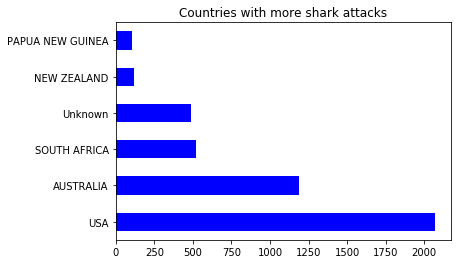

In [77]:
# version 2
dfsk.groupby("country").filter(lambda x: len(x) > 100).country.value_counts()\
.plot.barh(color='blue', title = 'Countries with more shark attacks')

## 2. Are the victims of fatal attacks more women or men?

In [78]:
dfsk.sex.value_counts()

M          4304
Unknown     889
F           551
Name: sex, dtype: int64

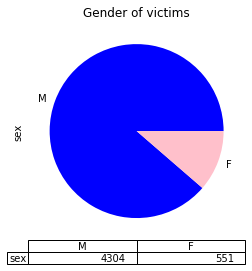

In [79]:
dfsk[dfsk['sex'].isin(['M','F'])]['sex'].value_counts().plot(kind='pie',title= "Gender of victims",colors= ['blue','pink'], table =True)

## 3. Sharks attacks per year

In [80]:
# drop all the lines with invalid values 'unknown'
dfsk = dfsk.drop(dfsk[dfsk.year=='Unknown'].index)

In [81]:
# print(set(dfsk['year']))

In [82]:
dfsk['year'].astype(int)

0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
6156    1738
6159    1721
6160    1703
6162    1700
6168    1642
Name: year, Length: 5254, dtype: int32

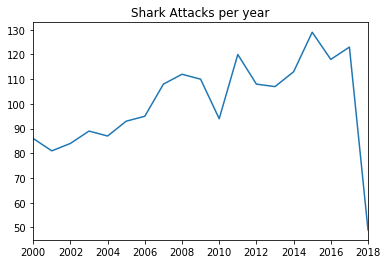

In [83]:
dfsk['year_2000'] = dfsk[dfsk['year']>1999]['year']
years_values = dfsk['year_2000'].value_counts().sort_index()

%matplotlib inline
years_values.plot(title="Shark Attacks per year")


In [84]:
print(set(dfsk['year_2000']))

{nan, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018}


## Hypothesis

IN THE LAST EIGHT YEARS THE NUMBER OF SHARK ATTACKS HAS BEEN CONSTANT ALL OVER THE WORLD

In [85]:
# Filter the Dataframe for the activity of 'surfing'
dfsk = dfsk[dfsk.activity == 'Surfing']
dfsk.head()

,case_number,date,year,country,area,activity,sex,injury,fatal (y/n),year_2000
2,2018.06.09,09-Jun-2018,2018,USA,Hawaii,Surfing,M,Injury to left lower leg from surfboard skeg,N,2018
3,2018.06.08,08-Jun-2018,2018,AUSTRALIA,New South Wales,Surfing,M,Minor injury to lower leg,N,2018
15,2018.05.12,12-May-2018,2018,SOUTH AFRICA,Eastern Cape Province,Surfing,M,"Minor injury, marks on board",N,2018
16,2018.05.09,09-May-2018,2018,AUSTRALIA,New South Wales,Surfing,M,"No injury, surfboard damaged",N,2018
19,2018.04.28.a,28-Apr-2018,2018,AUSTRALIA,Western Australia,Surfing,M,"No injury, knocked off board by shark",N,2018


In [86]:
dfsk = dfsk.reset_index(drop=True)
dfsk

,case_number,date,year,country,area,activity,sex,injury,fatal (y/n),year_2000
0,2018.06.09,09-Jun-2018,2018,USA,Hawaii,Surfing,M,Injury to left lower leg from surfboard skeg,N,2018
1,2018.06.08,08-Jun-2018,2018,AUSTRALIA,New South Wales,Surfing,M,Minor injury to lower leg,N,2018
2,2018.05.12,12-May-2018,2018,SOUTH AFRICA,Eastern Cape Province,Surfing,M,"Minor injury, marks on board",N,2018
3,2018.05.09,09-May-2018,2018,AUSTRALIA,New South Wales,Surfing,M,"No injury, surfboard damaged",N,2018
4,2018.04.28.a,28-Apr-2018,2018,AUSTRALIA,Western Australia,Surfing,M,"No injury, knocked off board by shark",N,2018
...,...,...,...,...,...,...,...,...,...,...
954,1935.03.11,11-Mar-1935,1935,AUSTRALIA,New South Wales,Surfing,M,Abrasions to shins,N,NaN
955,1922.01.04,04-Jan-1922,1922,AUSTRALIA,New South Wales,Surfing,M,"FATAL, disappeared, then his shark-bitten rema...",Y,NaN
956,1918.03.22,22-Mar-1918,1918,AUSTRALIA,New South Wales,Surfing,M,"Severe laceration to arm, necessitating surgic...",N,NaN
957,1828.00.00,1828,1828,USA,Hawaii,Surfing,M,FATAL,Y,NaN


In [87]:
del dfsk['year']

In [88]:
# Know how many attacks on surfers there have been

dfsk = dfsk[(dfsk['activity'] == 'Surfing')]
dfsk.count().unique()

#959 surfers attacks

array([959, 625], dtype=int64)

In [89]:
# USA vs rest of the world
dfsk_USA = dfsk.loc[(dfsk.country=='USA')]
dfsk_USA.shape
# 559 attacks in the USA

(559, 9)

In [90]:
dfsk_RoW = dfsk.loc[~(dfsk.country=='USA')]
dfsk_RoW.shape
# 400 attacks in the rest of the world

(400, 9)

In [91]:
# Years when the highest number of attacks have occurred to surfers
dfsk[['country', 'year_2000']]['year_2000'].value_counts()
# 2012 is the year with the highest numbers of attacks all over the world

2012    42
2015    41
2009    39
2016    39
2007    38
2008    38
2011    36
2017    36
2014    35
2003    34
2005    34
2010    34
2013    33
2001    32
2006    29
2002    25
2004    24
2000    21
2018    15
Name: year_2000, dtype: int64

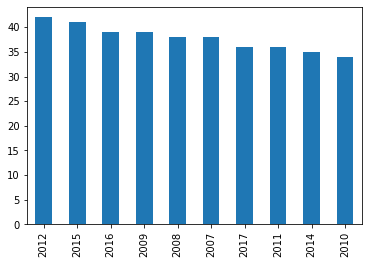

In [92]:
# Graph
dfsk[['country', 'year_2000']]['year_2000'].value_counts().sort_values(ascending=True).nlargest(10).plot.bar()

In [93]:
# Graph USA ?
# dfsk[dfsk.country == 'USA'],'year_2000'

## Conclusion

Tha graph confirms my hyphotesis that in the last 8 years the attacks of sharks per years were more or less constant.

This analysis is quite poor but I have wasted time cleaning the database and organizing it. I wasn't able to use all the columns I think of. I would have liked to build more function but I had no sufficient time.